In [1]:
import numpy as np
import pandas as pd 


In [2]:
data = pd.read_excel("CVL.xlsx")

In [3]:
data

,type,VP-EL,VP-GO,VP-ES,tram,bus,2RM,marche,velo,train
0,Mpkm (ville),0,2375.131182,970.124004,181.177418,254.706058,122.506422,139.327818,72.553079,33.941818
1,Mpkm (rural),0,10808.017253,4414.542258,41.761384,795.635346,182.608731,231.417392,189.197008,281.32658
2,Mvkm (ville),0,1605.304296,655.68767,181.177418,254.706058,122.506422,139.327818,72.553079,33.941818
3,Mvkm (rural),0,7304.925581,2983.701998,41.761384,795.635346,182.608731,231.417392,189.197008,281.32658
4,CO2/vkm (ville),0.255,174.000000,184,3.8,136,64,0,0,7.5
5,CO2/vkm (rural),0.255,195.000000,208,3.8,136,64,0,0,7.5
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Moyenne de Tx remplissage local,en kWh/km,1.479552,1.479552,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,1.479552,1.479552,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Changement d'unité
list_transport = data.columns[1:]
list_transport = list_transport.tolist()
mpkm_ville = data.loc[data['type'] == 'Mpkm (ville)'].to_numpy()[:, 1:].squeeze() * 1e6 # km
mpkm_rural = data.loc[data['type'] == 'Mpkm (rural)'].to_numpy()[:, 1:].squeeze() * 1e6 # km

mvkm_ville = data.loc[data['type'] == 'Mvkm (ville)'].to_numpy()[:, 1:].squeeze() * 1e6 # km
mvkm_rural = data.loc[data['type'] == 'Mvkm (rural)'].to_numpy()[:, 1:].squeeze() * 1e6 # km

# Calcul de l'empreinte carbone de chaque mode de transport
CO2_ville = data.loc[data['type'] == 'CO2/vkm (ville)'].to_numpy()[:, 1:].squeeze() / 1e6 # tCO2/km
CO2_rural = data.loc[data['type'] == 'CO2/vkm (rural)'].to_numpy()[:, 1:].squeeze() / 1e6 # tCO2/km

CO2_ville[0] = CO2_ville[0] * 0.55 # kw/h -> tCO2/km
CO2_rural[0] = CO2_rural[0] * 0.55 # kw/h -> tCO2/km



In [5]:
mvkm_rural

array([0.0, 7304925580.567744, 2983701997.696684, 41761383.91842347,
       795635345.871129, 182608731.31211606, 231417392.3725639,
       189197008.02991578, 281326580.01722497], dtype=object)

In [6]:
def get_emission_region(mvkm, CO2perkm, part_traffic_total = 0.2):
    """get_emission_region calculate the emission of the region given it's traffic part


    Parameters
    ----------
    mvkm : np.ndarray
        Millions of vehicule.km
    CO2perkm : 
        CO2 emitted per km for each vehicule, CO2/vehicule.km
    part_traffic_total : float, optional
        percentage of the emission bilan of the region that is due to traffic, by default 0.2

    Returns
    -------
    float
        CO2 emission in Mtons
    """
    return sum(mvkm * CO2perkm ) / 1e6 * 1/part_traffic_total

def convert_pkm_into_vkm(mpkm, passperveh):
    """convert_pkm_into_vkm convert passenger.km into vehicule.km


    Parameters
    ----------
    mpkm : 
        Millions of passenger.km
    passperveh : _type_
        passenger per vehicule

    Returns
    -------
    _type_
        millions of vehicule.km
    """

    return mpkm / passperveh

def convert_vkm_into_pkm(mvkm, passperveh):
    """convert_vkm_into_pkm convert vehicule.km into passenger.km


    Parameters
    ----------
    mvkm : 
        Millions of vehicule.km
    passperveh : _type_
        passenger per vehicule

    Returns
    -------
    _type_
        millions of passenger.km
    """

    return mvkm * passperveh

def car_share(mpkm, on=True, initial_occupation_VP=1.5, increase_in_percentage = 15):
    """car_share change the car share of the region


    Parameters
    ----------
    mpkm : np.ndarray
        Millions of passenger.km
    on : bool, optional
        True if the car share is increased, by default True
    initial_occupation_VP : float, optional
        initial occupation of the vehicule, by default 1.5
    increase_in_percentage : int, optional
        increase in percentage of the car share, by default 15

    Returns 
    -------
    np.ndarray
        Millions of passenger.km
    """
    
    occupation = np.ones_like(mpkm)
    if on:
        occupation[0:3] = initial_occupation_VP * (1 + increase_in_percentage/100)
        return convert_pkm_into_vkm(mpkm, occupation)
    else:
        occupation[0:3] = initial_occupation_VP
        return convert_pkm_into_vkm(mpkm, occupation)



def modal_change(mpkm, switch_matrix):
    """modal_change change the modal share of the region


    Parameters
    ----------
    mpkm : np.ndarray
        Millions of passenger.km
    switch_matrix : np.ndarray
        switch matrix

    Returns
    -------
    np.ndarray
        Millions of passenger.km
    """

    mpkm = mpkm.copy()
    for idx in range(len(mpkm)):
        mpkm[idx] = mpkm[idx] + sum(switch_matrix[:, idx] )  - sum(switch_matrix[idx, :])
    return mpkm

N = len(list_transport)
switch_matrix_modal = np.zeros((N,N))
switch_matrix_modal[1, 0] = 0.9
switch_matrix_modal[2, 0] = 0.9
def make_VP_to_VE_switch_matrix(mpkm, proportion_switched = 0.9):
    """make_VP_to_VE_switch_matrix create a switch matrix from VP to VE


    Parameters
    ----------
    mpkm : np.ndarray
        Millions of passenger.km
    proportion_switched : float, optional
        proportion of the traffic that is switched, by default 0.9

    Returns
    -------
    np.ndarray
        switch matrix
    """
    
    N = len(mpkm)
    switch_matrix_EV = np.zeros((N,N))
    switch_matrix_EV[1, 0] = proportion_switched * mpkm[1]
    switch_matrix_EV[2, 0] = proportion_switched * mpkm[2]
    return switch_matrix_EV


def make_VP_more_efficient(CO2, increase_in_percentage = 50):
    CO2 = CO2.copy()
    CO2[1:3] = CO2[1:3] * (1 - increase_in_percentage/100)
    return CO2

def make_fuel_more_efficient(CO2, increase_in_percentage = 50):
    CO2 = CO2.copy()
    CO2[1:3] = CO2[1:3] * (1 - increase_in_percentage/100)
    return CO2

def make_bus_more_efficient(CO2, eff_bus):
    CO2 = CO2.copy()
    CO2[list_transport.index('bus')] = eff_bus
    return CO2



eff_bus_ville = 71.8/1e6
eff_bus_rural = 91.91/1e6


# switch_matrix_EV = np.zeros((N,N))
# switch_matrix_EV[1, 0] = 0.9 * mpkm[1]
# switch_matrix_EV[2, 0] = 0.9 * mpkm[2]
# switch_matrix_EV = switch_matrix_EV 


switch_matrix_modal_ville = np.zeros((N,N))
# if there is some VE, then the modal change is different, we take min(VE/3, report_modal/3) on the VE and the rest on the other VP

switch_matrix_modal_ville[0, list_transport.index('tram')] = min(mpkm_ville[0]/3, mpkm_ville[list_transport.index('tram')]) * (50/100) 

switch_matrix_modal_ville[1:3,list_transport.index('tram')] = (mpkm_ville[list_transport.index('tram')] * (50/100) * np.ones(2) - switch_matrix_modal_ville[0, list_transport.index('tram')])/2
switch_matrix_modal_ville[1:3,list_transport.index('bus')] = mpkm_ville[list_transport.index('bus')] * (30/100) * np.ones(2)/2
switch_matrix_modal_ville[1:3,list_transport.index('train')] = mpkm_ville[list_transport.index('train')] * (50/100) * np.ones(2)/2

switch_matrix_modal_ville[1,list_transport.index('velo')] = (sum(mpkm_ville) - mpkm_ville[list_transport.index('velo')])* (15/100)  



def make_switch_matrix_modal(mpkm, list_transport, 
                             increase_tram = 50,
                             increase_bus = 30,
                             increase_train = 50,
                             modal_change_velo = 15):
    mpkm = mpkm.copy()
    N = len(list_transport)
    switch_matrix_modal = np.zeros((N,N))
    switch_matrix_modal[0, list_transport.index('tram')] = min(mpkm[0]/3, mpkm[list_transport.index('tram')]) * (increase_tram/100)
    switch_matrix_modal[1:3,list_transport.index('tram')] = (mpkm[list_transport.index('tram')] * (increase_tram/100) - switch_matrix_modal[0, list_transport.index('tram')]) * np.ones(2) /2

    switch_matrix_modal[0, list_transport.index('bus')] = min(mpkm[0]/3, mpkm[list_transport.index('bus')]) * (increase_bus/100)
    switch_matrix_modal[1:3,list_transport.index('bus')] = (mpkm[list_transport.index('bus')] * (increase_bus/100) - switch_matrix_modal[0, list_transport.index('bus')]) * np.ones(2) /2

    switch_matrix_modal[0, list_transport.index('train')] = min(mpkm[0]/3, mpkm[list_transport.index('train')]) * (increase_train/100)
    switch_matrix_modal[1:3,list_transport.index('train')] = (mpkm[list_transport.index('train')] * (increase_train/100) - switch_matrix_modal[0, list_transport.index('train')]) * np.ones(2) /2

    switch_matrix_modal[1,list_transport.index('velo')] = (sum(mpkm) - mpkm[list_transport.index('velo')])* (modal_change_velo/100)

    return switch_matrix_modal

switch_matrix_modal_rural = np.zeros((N,N))
# switch_matrix_modal_rural[1:3,list_transport.index('tram')] = mpkm_rural[list_transport.index('tram')] * (50/100) * np.ones(2)/2
# switch_matrix_modal_rural[1:3,list_transport.index('bus')] = mpkm_rural[list_transport.index('bus')] * (30/100) * np.ones(2)/2
switch_matrix_modal_rural[1:3,list_transport.index('train')] = mpkm_rural[list_transport.index('train')] * (50/100) * np.ones(2)/2

# switch_matrix_modal_rural[1,list_transport.index('velo')] = (sum(mpkm_rural) - mpkm_rural[list_transport.index('velo')])* (15/100)  

switch_matrix_modal_rural =make_switch_matrix_modal(mpkm_rural, list_transport, 
                             increase_tram = 0,
                             increase_bus = 0,
                             increase_train = 0,
                             modal_change_velo = 0)

switch_matrix_modal_ville =make_switch_matrix_modal(mpkm_ville, list_transport,
                                increase_tram = 50,
                                increase_bus = 30,
                                increase_train = 0,
                                modal_change_velo = 15)

def activate_levers(mpkm, CO2, levers, 
                    switch_matrix_modal,  # modal_change
                    initial_occupation_VP = 1.5,               # car_pooling     
                    increase_in_percentage = 15,               # car_pooling 
                    proportion_switched = 0.9,               # VP_to_VE             
                    increase_in_percentage_eff = 50,            # VP_more_efficient
                    increase_in_percentage_eff_fuel = 50,           # fuel_more_efficient
                    eff_bus = eff_bus_ville                         # bus_more_efficient

                    ):
                    
    """activate_levers activate the levers


    Parameters
    ----------
    mpkm : np.ndarray
        Millions of passenger.km
    CO2 : np.ndarray
        CO2 emitted per km for each vehicule, CO2/vehicule.km
    levers : list
        list of levers to activate

    Returns
    -------
    np.ndarray
        Millions of passenger.km
    np.ndarray
        CO2 emitted per km for each vehicule, CO2/vehicule.km
    """

    mpkm = mpkm.copy()
    CO2 = CO2.copy()
    for lever in levers:
        if lever == 'modal_change':
            mpkm = modal_change(mpkm, switch_matrix_modal)
        if lever == 'VP_to_VE':
            mpkm = modal_change(mpkm, make_VP_to_VE_switch_matrix(mpkm, proportion_switched = proportion_switched))
        if lever == 'VP_more_efficient':
            CO2 = make_VP_more_efficient(CO2, increase_in_percentage = increase_in_percentage_eff)
        if lever == 'fuel_more_efficient':
            CO2 = make_fuel_more_efficient(CO2, increase_in_percentage = increase_in_percentage_eff_fuel)
        if lever == 'bus_more_efficient':
            CO2 = make_bus_more_efficient(CO2, eff_bus)

    if 'car_share' in levers:
        mpkm = car_share(mpkm, on=True, initial_occupation_VP=initial_occupation_VP, increase_in_percentage = increase_in_percentage)
    if 'car_share' not in levers:
        mpkm = car_share(mpkm, on=False, initial_occupation_VP=initial_occupation_VP, increase_in_percentage = increase_in_percentage)
    return mpkm, CO2

In [7]:
import random

# emission de la région
mvkm_ville = car_share(mpkm_ville, on=False, initial_occupation_VP=1.5, increase_in_percentage = 15)
mvkm_rural = car_share(mpkm_rural, on=False, initial_occupation_VP=1.5, increase_in_percentage = 15)

emission_ville = get_emission_region(mvkm_ville, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville, "Mtons")
emission_rural = get_emission_region(mvkm_rural, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural, "Mtons")
emission_region = (emission_ville + emission_rural)
print("Emission de transport région: ", emission_region, "Mtons")
print("Emission de la région: ", emission_region/0.14, "Mtons")


# activate all levers on the ville and rural region
list_levers = ['car_share', 'modal_change', 'VP_to_VE', 'VP_more_efficient', 'fuel_more_efficient', 'bus_more_efficient']
random.shuffle(list_levers)
mvkm_ville, CO2_ville_new = activate_levers(mpkm_ville, CO2_ville, levers = list_levers , switch_matrix_modal = switch_matrix_modal_ville, eff_bus = eff_bus_ville)
mvkm_rural, CO2_rural_new = activate_levers(mpkm_rural, CO2_rural, levers = list_levers, switch_matrix_modal = switch_matrix_modal_rural, eff_bus = eff_bus_rural)
emission_region_all = get_emission_region(mvkm_ville, CO2_ville_new, part_traffic_total=1) + get_emission_region(mvkm_rural, CO2_rural_new, part_traffic_total=1)
print("Emission de transport région: ", emission_region_all, "Mtons")
print("Emission de la région: ", emission_region_all/0.14, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_all)/emission_region * 100, "%")


Emission de la ville:  0.43794056767067246 Mtons
Emission rural:  2.139354111076219 Mtons
Emission de transport région:  2.5772946787468913 Mtons
Emission de la région:  18.409247705334938 Mtons
Emission de transport région:  0.17173919672966595 Mtons
Emission de la région:  1.2267085480690423 Mtons
Reduction de l'empreinte carbone:  93.3364547660818 %


In [8]:
mvkm_rural + mvkm_ville

array([9281361893.290356, 723948461.6405573, 307313970.9472599,
       313527510.4136467, 1126753221.4489791, 305115153.66733056,
       370745210.83782107, 873287295.3113245, 315268397.9915725],
      dtype=object)

In [9]:
switch_matrix_EV = make_VP_to_VE_switch_matrix(mpkm_ville, proportion_switched = 0.9)
switch_matrix_EV 

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.13761806e+09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [8.73111603e+08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.0

In [10]:
sum(mpkm_rural+mpkm_ville)/1e6

21093.97375181053

In [11]:
sum(mvkm_ville + mvkm_rural)/1e6

13617.321115548848

In [12]:
# make a dataframe with the results of the simulation of the different scenarios

df = pd.DataFrame(columns=['scenario', 'emission', 'emission_region', 'reduction_emission'])



# emission de la région
mvkm_ville = car_share(mpkm_ville, on=False, initial_occupation_VP=1.5, increase_in_percentage = 15)
mvkm_rural = car_share(mpkm_rural, on=False, initial_occupation_VP=1.5, increase_in_percentage = 15)

emission_ville = get_emission_region(mvkm_ville, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville, "Mtons")
emission_rural = get_emission_region(mvkm_rural, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural, "Mtons")
emission_region = (emission_ville + emission_rural)
print("Emission de transport région: ", emission_region, "Mtons")
print("Emission de la région: ", emission_region/0.14, "Mtons")

# add the results to the dataframe as new line 
df.loc[0] = ['emissions initiales', emission_region, emission_region/0.14, 0]


# emission de la région avec 10% de moins de traffic
mvkm_ville_10 = car_share(mpkm_ville * .9, on=False, initial_occupation_VP=1.5, increase_in_percentage = 15)
mvkm_rural_10 = car_share(mpkm_rural * .9, on=False, initial_occupation_VP=1.5, increase_in_percentage = 15)
print('---------------')
print('10% de moins de traffic')
print('---------------')
emission_ville_10 = get_emission_region(mvkm_ville_10, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville_10, "Mtons")
emission_rural_10 = get_emission_region(mvkm_rural_10, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural_10, "Mtons")
emission_region_10 = (emission_ville_10 + emission_rural_10)
print("Emission de transport région: ", emission_region_10, "Mtons")
print("Emission de la région: ", emission_region_10/0.14, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_10)/emission_region * 100, "%")

# add the results to the dataframe as new line
df.loc[1] = ['10% de moins de traffic', emission_region_10, emission_region_10/0.14, (emission_region - emission_region_10)/emission_region * 100]


# emission de la région avec 10% de moins de traffic et partage de voiture
mvkm_ville_10 = car_share(mpkm_ville * .9, on=True, initial_occupation_VP=1.5, increase_in_percentage = 15)
mvkm_rural_10 = car_share(mpkm_rural * .9, on=True, initial_occupation_VP=1.5, increase_in_percentage = 15)
print('---------------')
print('10% de moins de traffic et partage de voiture')
print('---------------')
emission_ville_10 = get_emission_region(mvkm_ville_10, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville_10, "Mtons")
emission_rural_10 = get_emission_region(mvkm_rural_10, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural_10, "Mtons")
emission_region_10 = (emission_ville_10 + emission_rural_10)
print("Emission de transport région: ", emission_region_10, "Mtons")
print("Emission de la région: ", emission_region_10/0.14, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_10)/emission_region * 100, "%")

# add the results to the dataframe as new line
df.loc[2] = ['partage de voiture', emission_region_10, emission_region_10/0.14, (emission_region - emission_region_10)/emission_region * 100]

# 10% de moins de traffic, partage de voiture et report modal
mvkm_ville_modal = car_share(modal_change(mpkm_ville * .9, switch_matrix_modal_ville) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15) 
mvkm_rural_modal = car_share(modal_change(mpkm_rural * .9, switch_matrix_modal_rural) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15) 
print('---------------')   
print('10% de moins de traffic, partage de voiture et report modal')
print('---------------')
emission_ville_modal = get_emission_region(mvkm_ville_modal, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville_modal, "Mtons")
emission_rural_modal = get_emission_region(mvkm_rural_modal, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural_modal, "Mtons")
emission_region_modal = (emission_ville_modal + emission_rural_modal)
print("Emission de transport région: ", emission_region_modal, "Mtons")
print("Emission de la région: ", emission_region_modal/0.14, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_modal)/emission_region * 100, "%")

# add the results to the dataframe as new line
df.loc[3] = ['report modal', emission_region_modal, emission_region_modal/0.14, (emission_region - emission_region_modal)/emission_region * 100]

# 10% de moins de traffic, partage de voiture, report modal et du report VP -> VE
mvkm_ville_modal = car_share(modal_change(mpkm_ville * .9, switch_matrix_modal_ville) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15) 
mvkm_rural_modal = car_share(modal_change(mpkm_rural * .9, switch_matrix_modal_rural) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15) 
switch_matrix_EV_ville = make_VP_to_VE_switch_matrix(mvkm_ville_modal, proportion_switched = 0.9)
switch_matrix_EV_rural = make_VP_to_VE_switch_matrix(mvkm_rural_modal, proportion_switched = 0.9)
mvkm_ville_EV = modal_change(mvkm_ville_modal, switch_matrix_EV_ville)
mvkm_rural_EV = modal_change(mvkm_rural_modal, switch_matrix_EV_rural)
print('---------------')
print('10% de moins de traffic, partage de voiture et report modal et du report VP -> VE')
print('---------------')
emission_ville_EV = get_emission_region(mvkm_ville_EV, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville_EV, "Mtons")
emission_rural_EV = get_emission_region(mvkm_rural_EV, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural_EV, "Mtons")
emission_region_EV = (emission_ville_EV + emission_rural_EV)
print("Emission de transport région: ", emission_region_EV, "Mtons")
print("Emission de la région: ", emission_region_EV/0.14, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_EV)/emission_region * 100, "%")

# add the results to the dataframe as new line
df.loc[4] = ['report VP -> VE', emission_region_EV, emission_region_EV/0.14, (emission_region - emission_region_EV)/emission_region * 100]

# 10% de moins de traffic, partage de voiture, report modal et du report VP -> VE et amélioration des VP et des carburants
mvkm_ville_modal = car_share(modal_change(mpkm_ville * .9, switch_matrix_modal_ville) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15)
mvkm_rural_modal = car_share(modal_change(mpkm_rural * .9, switch_matrix_modal_rural) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15)
switch_matrix_EV_ville = make_VP_to_VE_switch_matrix(mvkm_ville_modal, proportion_switched = 0.9)
switch_matrix_EV_rural = make_VP_to_VE_switch_matrix(mvkm_rural_modal, proportion_switched = 0.9)
mvkm_ville_EV = modal_change(mvkm_ville_modal, switch_matrix_EV_ville)
mvkm_rural_EV = modal_change(mvkm_rural_modal, switch_matrix_EV_rural)
CO2_ville_EV = make_VP_more_efficient(CO2_ville, increase_in_percentage = 50)
CO2_rural_EV = make_VP_more_efficient(CO2_rural, increase_in_percentage = 50)
CO2_ville_EV = make_fuel_more_efficient(CO2_ville_EV, increase_in_percentage = 50)
CO2_rural_EV = make_fuel_more_efficient(CO2_rural_EV, increase_in_percentage = 50)
print('---------------')
print('10% de moins de traffic, partage de voiture et report modal et du report VP -> VE et amélioration des VP et des carburants')
print('---------------')
emission_ville_EV = get_emission_region(mvkm_ville_EV, CO2_ville_EV, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville_EV, "Mtons")
emission_rural_EV = get_emission_region(mvkm_rural_EV, CO2_rural_EV, part_traffic_total = 1)
print("Emission rural: ", emission_rural_EV, "Mtons")
emission_region_EV = (emission_ville_EV + emission_rural_EV)
print("Emission de transport région: ", emission_region_EV, "Mtons")
print("Emission de la région: ", emission_region_EV/0.14, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_EV)/emission_region * 100, "%")

# add the results to the dataframe as new line
df.loc[5] = ['amélioration  VP/carburants', emission_region_EV, emission_region_EV/0.14, (emission_region - emission_region_EV)/emission_region * 100]

Emission de la ville:  0.43794056767067246 Mtons
Emission rural:  2.139354111076219 Mtons
Emission de transport région:  2.5772946787468913 Mtons
Emission de la région:  18.409247705334938 Mtons
---------------
10% de moins de traffic
---------------
Emission de la ville:  0.39414651090360514 Mtons
Emission rural:  1.9254186999685967 Mtons
Emission de transport région:  2.319565210872202 Mtons
Emission de la région:  16.56832293480144 Mtons
Reduction de l'empreinte carbone:  10.000000000000016 %
---------------
10% de moins de traffic et partage de voiture
---------------
Emission de la ville:  0.3478336345444404 Mtons
Emission rural:  1.6886178879213434 Mtons
Emission de transport région:  2.036451522465784 Mtons
Emission de la région:  14.546082303327028 Mtons
Reduction de l'empreinte carbone:  20.9849172755081 %
---------------
10% de moins de traffic, partage de voiture et report modal
---------------
Emission de la ville:  0.2795550565462113 Mtons
Emission rural:  1.68861788792134

In [13]:
# make a dataframe with the results of the simulation of the different scenarios

df = pd.DataFrame(columns=['scenario', 'emission', 'emission_region', 'reduction_emission'])



# emission de la région
mvkm_ville = car_share(mpkm_ville, on=False, initial_occupation_VP=1.5, increase_in_percentage = 15)
mvkm_rural = car_share(mpkm_rural, on=False, initial_occupation_VP=1.5, increase_in_percentage = 15)

emission_ville = get_emission_region(mvkm_ville, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville, "Mtons")
emission_rural = get_emission_region(mvkm_rural, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural, "Mtons")
emission_region = (emission_ville + emission_rural)
print("Emission de transport région: ", emission_region, "Mtons")
print("Emission de la région: ", emission_region/0.14, "Mtons")

# add the results to the dataframe as new line 
df.loc[0] = ['emissions initiales', emission_region, emission_region/0.14, 0]


# emission de la région avec 10% de moins de traffic
mvkm_ville_10 = car_share(mpkm_ville * .9, on=False, initial_occupation_VP=1.5, increase_in_percentage = 15)
mvkm_rural_10 = car_share(mpkm_rural * .9, on=False, initial_occupation_VP=1.5, increase_in_percentage = 15)
print('---------------')
print('10% de moins de traffic')
print('---------------')
emission_ville_10 = get_emission_region(mvkm_ville_10, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville_10, "Mtons")
emission_rural_10 = get_emission_region(mvkm_rural_10, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural_10, "Mtons")
emission_region_10 = (emission_ville_10 + emission_rural_10)
print("Emission de transport région: ", emission_region_10, "Mtons")
print("Emission de la région: ", emission_region_10/0.14, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_10)/emission_region * 100, "%")

# add the results to the dataframe as new line
df.loc[1] = ['10% de moins de traffic', emission_region_10, emission_region_10/0.14, (emission_region - emission_region_10)/emission_region * 100]


# emission de la région avec 10% de moins de traffic et partage de voiture
mvkm_ville_10 = car_share(mpkm_ville * .9, on=True, initial_occupation_VP=1.5, increase_in_percentage = 15)
mvkm_rural_10 = car_share(mpkm_rural * .9, on=True, initial_occupation_VP=1.5, increase_in_percentage = 15)
print('---------------')
print('10% de moins de traffic et partage de voiture')
print('---------------')
emission_ville_10 = get_emission_region(mvkm_ville_10, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville_10, "Mtons")
emission_rural_10 = get_emission_region(mvkm_rural_10, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural_10, "Mtons")
emission_region_10 = (emission_ville_10 + emission_rural_10)
print("Emission de transport région: ", emission_region_10, "Mtons")
print("Emission de la région: ", emission_region_10/0.14, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_10)/emission_region * 100, "%")

# add the results to the dataframe as new line
df.loc[2] = ['partage de voiture', emission_region_10, emission_region_10/0.14, (emission_region - emission_region_10)/emission_region * 100]

# 10% de moins de traffic, partage de voiture et report modal
mvkm_ville_modal = car_share(modal_change(mpkm_ville * .9, switch_matrix_modal_ville) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15) 
mvkm_rural_modal = car_share(modal_change(mpkm_rural * .9, switch_matrix_modal_rural) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15) 
print('---------------')   
print('10% de moins de traffic, partage de voiture et report modal')
print('---------------')
emission_ville_modal = get_emission_region(mvkm_ville_modal, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville_modal, "Mtons")
emission_rural_modal = get_emission_region(mvkm_rural_modal, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural_modal, "Mtons")
emission_region_modal = (emission_ville_modal + emission_rural_modal)
print("Emission de transport région: ", emission_region_modal, "Mtons")
print("Emission de la région: ", emission_region_modal/0.14, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_modal)/emission_region * 100, "%")

# add the results to the dataframe as new line
df.loc[3] = ['report modal', emission_region_modal, emission_region_modal/0.14, (emission_region - emission_region_modal)/emission_region * 100]

# 10% de moins de traffic, partage de voiture, report modal et du report VP -> VE
mvkm_ville_modal = car_share(modal_change(mpkm_ville * .9, switch_matrix_modal_ville) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15) 
mvkm_rural_modal = car_share(modal_change(mpkm_rural * .9, switch_matrix_modal_rural) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15) 
switch_matrix_EV_ville = make_VP_to_VE_switch_matrix(mvkm_ville_modal, proportion_switched = 0.9)
switch_matrix_EV_rural = make_VP_to_VE_switch_matrix(mvkm_rural_modal, proportion_switched = 0.9)
mvkm_ville_EV = modal_change(mvkm_ville_modal, switch_matrix_EV_ville)
mvkm_rural_EV = modal_change(mvkm_rural_modal, switch_matrix_EV_rural)
print('---------------')
print('10% de moins de traffic, partage de voiture et report modal et du report VP -> VE')
print('---------------')
emission_ville_EV = get_emission_region(mvkm_ville_EV, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville_EV, "Mtons")
emission_rural_EV = get_emission_region(mvkm_rural_EV, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural_EV, "Mtons")
emission_region_EV = (emission_ville_EV + emission_rural_EV)
print("Emission de transport région: ", emission_region_EV, "Mtons")
print("Emission de la région: ", emission_region_EV/0.14, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_EV)/emission_region * 100, "%")

# add the results to the dataframe as new line
df.loc[4] = ['report VP -> VE', emission_region_EV, emission_region_EV/0.14, (emission_region - emission_region_EV)/emission_region * 100]

# 10% de moins de traffic, partage de voiture, report modal et du report VP -> VE et amélioration des VP et des carburants
mvkm_ville_modal = car_share(modal_change(mpkm_ville * .9, switch_matrix_modal_ville) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15)
mvkm_rural_modal = car_share(modal_change(mpkm_rural * .9, switch_matrix_modal_rural) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15)
switch_matrix_EV_ville = make_VP_to_VE_switch_matrix(mvkm_ville_modal, proportion_switched = 0.9)
switch_matrix_EV_rural = make_VP_to_VE_switch_matrix(mvkm_rural_modal, proportion_switched = 0.9)
mvkm_ville_EV = modal_change(mvkm_ville_modal, switch_matrix_EV_ville)
mvkm_rural_EV = modal_change(mvkm_rural_modal, switch_matrix_EV_rural)
CO2_ville_EV = make_VP_more_efficient(CO2_ville, increase_in_percentage = 50)
CO2_rural_EV = make_VP_more_efficient(CO2_rural, increase_in_percentage = 50)
CO2_ville_EV = make_fuel_more_efficient(CO2_ville_EV, increase_in_percentage = 50)
CO2_rural_EV = make_fuel_more_efficient(CO2_rural_EV, increase_in_percentage = 50)
print('---------------')
print('10% de moins de traffic, partage de voiture et report modal et du report VP -> VE et amélioration des VP et des carburants')
print('---------------')
emission_ville_EV = get_emission_region(mvkm_ville_EV, CO2_ville_EV, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville_EV, "Mtons")
emission_rural_EV = get_emission_region(mvkm_rural_EV, CO2_rural_EV, part_traffic_total = 1)
print("Emission rural: ", emission_rural_EV, "Mtons")
emission_region_EV = (emission_ville_EV + emission_rural_EV)
print("Emission de transport région: ", emission_region_EV, "Mtons")
print("Emission de la région: ", emission_region_EV/0.14, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_EV)/emission_region * 100, "%")

# add the results to the dataframe as new line
df.loc[5] = ['amélioration  VP/carburants', emission_region_EV, emission_region_EV/0.14, (emission_region - emission_region_EV)/emission_region * 100]

Emission de la ville:  0.43794056767067246 Mtons
Emission rural:  2.139354111076219 Mtons
Emission de transport région:  2.5772946787468913 Mtons
Emission de la région:  18.409247705334938 Mtons
---------------
10% de moins de traffic
---------------
Emission de la ville:  0.39414651090360514 Mtons
Emission rural:  1.9254186999685967 Mtons
Emission de transport région:  2.319565210872202 Mtons
Emission de la région:  16.56832293480144 Mtons
Reduction de l'empreinte carbone:  10.000000000000016 %
---------------
10% de moins de traffic et partage de voiture
---------------
Emission de la ville:  0.3478336345444404 Mtons
Emission rural:  1.6886178879213434 Mtons
Emission de transport région:  2.036451522465784 Mtons
Emission de la région:  14.546082303327028 Mtons
Reduction de l'empreinte carbone:  20.9849172755081 %
---------------
10% de moins de traffic, partage de voiture et report modal
---------------
Emission de la ville:  0.2795550565462113 Mtons
Emission rural:  1.68861788792134

In [14]:
passpervkm_ville = np.ones_like(mpkm_ville)
passpervkm_ville[0:3] = 1.5* (1+.15)
mpkm_ville_EV = convert_vkm_into_pkm(mvkm_ville_EV, passpervkm_ville)

passpervkm_rural = np.ones_like(mpkm_rural)
passpervkm_rural[0:3] = 1.5* (1+.15)
mpkm_rural_EV = convert_vkm_into_pkm(mvkm_rural_EV, passpervkm_rural)


mpkm = (mpkm_ville_EV + mpkm_rural_EV) 

In [15]:
passpervkm_ville

array([1.7249999999999999, 1.7249999999999999, 1.7249999999999999, 1, 1,
       1, 1, 1, 1], dtype=object)

In [16]:
dict = {}

for mode in list_transport:
    dict[mode] = mpkm[list_transport.index(mode)]/1e6

In [17]:
dict

{'VP-EL': 14339.24594324346,
 'VP-GO': 1116.9796119850157,
 'VP-ES': 476.26993726425684,
 'tram': 291.23363025545615,
 'bus': 1021.7190810481856,
 '2RM': 274.60363830059754,
 'marche': 333.670689754039,
 'velo': 847.1122865860411,
 'train': 283.74155819241525}

In [18]:
df['reduction_emission'] = 100 - df['reduction_emission'].astype(float)

In [31]:
df['scenario'] = df['scenario'].astype(str)
# rewrite the scenario names
df['scenario'] = df['scenario'].replace('emissions initiales', 'Emissions initiales')
df['scenario'] = df['scenario'].replace('10% de moins de traffic', '10% de moins\n de traffic')
df['scenario'] = df['scenario'].replace('partage de voiture', 'Remplissage des véhicules')
df['scenario'] = df['scenario'].replace('report modal', 'Report modal urbain')
df['scenario'] = df['scenario'].replace('report VP -> VE', '90% éléc')
df['scenario'] = df['scenario'].replace('amélioration  VP/carburants', 'Efficacité VP\n thermique')

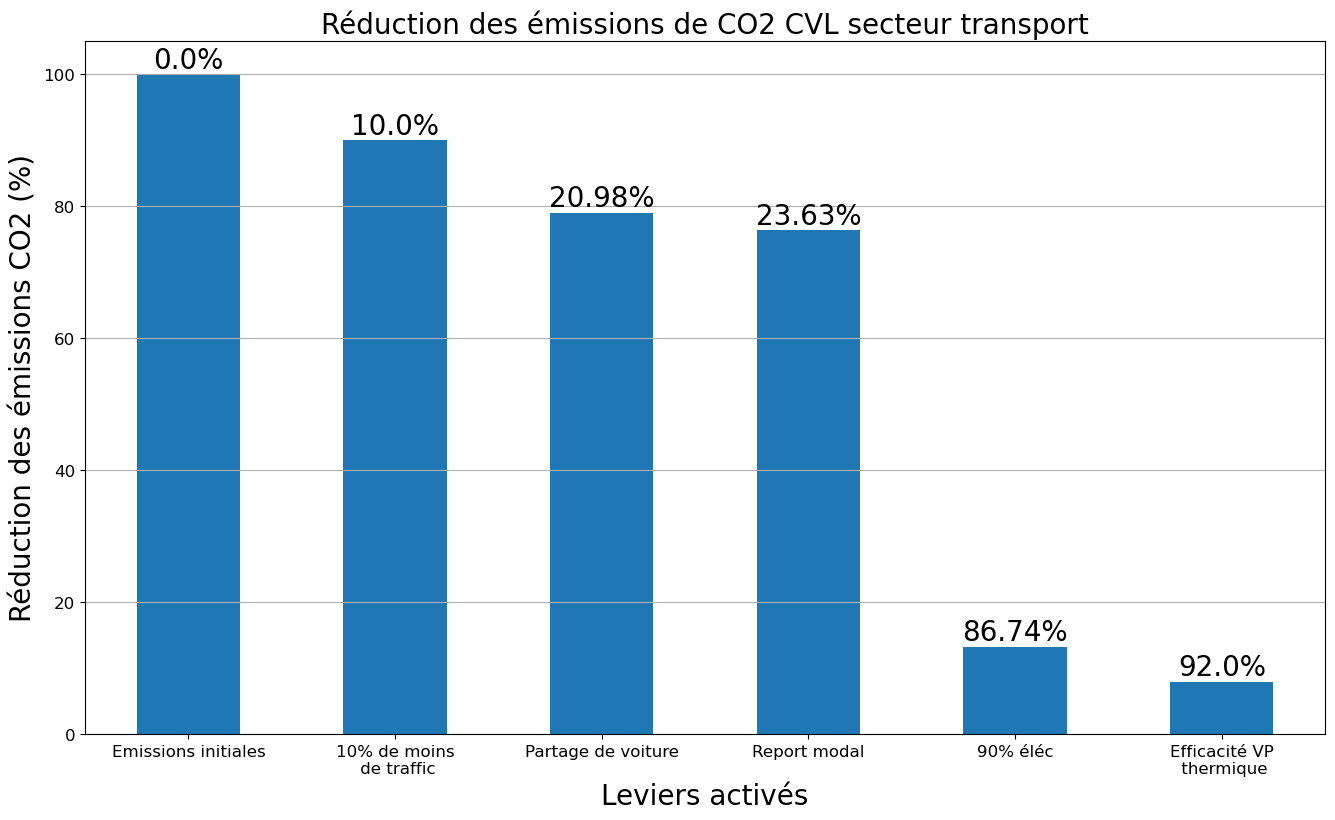

In [36]:
import  matplotlib.pyplot as plt
# plot the results with the value of the reduction of the emission in the bar
df.plot.bar(x='scenario', y='reduction_emission', rot=0, figsize=(16,9), fontsize=12, legend=False)
plt.grid(axis='y')
# add the value of the reduction of the emission on the top of the bar
for index, value in enumerate(df['reduction_emission'].values):
    plt.text(index, value, str(round(100-value,2)) + '%', fontsize=20, horizontalalignment='center', verticalalignment='bottom')
plt.xlabel('Leviers activés', fontsize=20)
plt.ylabel('Réduction des émissions CO2 (%)', fontsize=20)
plt.title('Réduction des émissions de CO2 CVL secteur transport', fontsize=20)
plt.show()


In [20]:
# 10% de moins de traffic, partage de voiture, report modal et du report VP -> VE
mvkm_ville_modal = car_share(modal_change(mpkm_ville * .9, switch_matrix_modal_ville) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15) 
mvkm_rural_modal = car_share(modal_change(mpkm_rural * .9, switch_matrix_modal_rural) , on=True, initial_occupation_VP=1.5, increase_in_percentage = 15) 
switch_matrix_EV_ville = make_VP_to_VE_switch_matrix(mvkm_ville_modal, proportion_switched = 0.9)
switch_matrix_EV_rural = make_VP_to_VE_switch_matrix(mvkm_rural_modal, proportion_switched = 0.9)
mvkm_ville_EV = modal_change(mvkm_ville_modal, switch_matrix_EV_ville)
mvkm_rural_EV = modal_change(mvkm_rural_modal, switch_matrix_EV_rural)
print('---------------')
print('10% de moins de traffic, partage de voiture et report modal et du report VP -> VE')
print('---------------')
emission_ville_EV = get_emission_region(mvkm_ville_EV, CO2_ville, part_traffic_total = 1)
print("Emission de la ville: ", emission_ville_EV, "Mtons")
emission_rural_EV = get_emission_region(mvkm_rural_EV, CO2_rural, part_traffic_total = 1)
print("Emission rural: ", emission_rural_EV, "Mtons")
emission_region_EV = (emission_ville_EV + emission_rural_EV)
print("Emission de transport région: ", emission_region_EV, "Mtons")
print("Emission de la région: ", emission_region_EV/0.17, "Mtons")

print("Reduction de l'empreinte carbone: ", (emission_region - emission_region_EV)/emission_region * 100, "%")

# emission de la région avec du report modal et du report VP -> VE, 10% de moins de traffic, 15% de partage de voiture

---------------
10% de moins de traffic, partage de voiture et report modal et du report VP -> VE
---------------
Emission de la ville:  0.07295447664700992 Mtons
Emission rural:  0.2688155204591635 Mtons
Emission de transport région:  0.34176999710617345 Mtons
Emission de la région:  2.010411747683373 Mtons
Reduction de l'empreinte carbone:  86.73919595130093 %


In [21]:
(mvkm_ville_EV + mvkm_rural_EV ) / sum(mvkm_ville_EV + mvkm_rural_EV)

array([0.6764645617629923, 0.05269434157907529, 0.02246838750570157,
       0.02370005530284175, 0.0831456130377889, 0.022346737251385092,
       0.02715350487912933, 0.06893643437468285, 0.023090364306402923],
      dtype=object)

In [22]:
emission_total = get_emission_region(mvkm_ville + mvkm_rural, CO2_rural, part_traffic_total = 0.17)
print("Emission de la région: ", emission_total, "Mtons")

Emission de la région:  15.44746176091635 Mtons


In [23]:
mpkm_ville/sum(mpkm_ville)

array([0.0, 0.5723941711599566, 0.23379480230477098, 0.04366280844025004,
       0.0613828255663465, 0.02952340595742042, 0.03357727429003215,
       0.017484911975865026, 0.008179800305358255], dtype=object)

In [24]:
modal_change(mpkm_ville, switch_matrix_modal_ville)/sum(mpkm_ville)

array([0.0, 0.4048937820113218, 0.2136716763597565, 0.06549421266037506,
       0.07979767323625045, 0.02952340595742042, 0.03357727429003215,
       0.1648621751794853, 0.008179800305358255], dtype=object)

In [25]:
list_transport.index('velo')

7

In [26]:
mpkm/sum(mpkm)

array([0.7553102928804597, 0.05883616204152166, 0.025087203834084918,
       0.015340538786737041, 0.05381837660101542, 0.014464564963305795,
       0.017575882818475563, 0.04462107922665366, 0.014945898847746152],
      dtype=object)

In [27]:


# fonction leviers
def sobriety(mpkm, reduction = 0.0):
    return mpkm * (1-reduction)

def co2_after_levers(mpkm, 
                     modal_change,
                     change_elec,
                     )

def levier_decarboner_thermique(mpkm, coef):
    mpkm_= mpkm.copy()
    mpkm_[1] = mpkm[1] * (1 - coef)
    mpkm_[2] = mpkm[2] * (1 - coef)
    return mpkm_

def levier_VP_thermique_plus_eff(mpkm, coef):
    mpkm_= mpkm.copy()
    mpkm_[1] = mpkm[1] * coef
    mpkm_[2] = mpkm[2] * coef
    return mpkm_


def activation_leviers(leviers, mpkm, CO2, part_traffic_total = 0.2):
    mpkm_ = mpkm.copy()
    for levier in leviers:
        if levier[0] == 'km':
            mpkm_ = levier_reduction_km(mpkm_, levier[1])
        elif levier[0] == 'remplissage_VP':
            mpkm_ = levier_augmenter_remplissage_VP(mpkm_, levier[1])
        elif levier[0] == 'changer_mode':
            mpkm_ = levier_changer_mode(mpkm_, levier[1], levier[2], levier[3], levier[4], levier[5], levier[6])
        elif levier[0] == 'changer_VP_thermique_en_VP_elec':
            mpkm_ = levier_changer_VP_thermique_en_VP_elec(mpkm_, levier[1])
        elif levier[0] == 'decarboner_thermique':
            mpkm_ = levier_decarboner_thermique(mpkm_, levier[1])
        elif levier[0] == 'VP_thermique_plus_eff':
            mpkm_ = levier_VP_thermique_plus_eff(mpkm_, levier[1])
    return mpkm_, get_emission_region(mpkm_, CO2, part_traffic_total)

SyntaxError: invalid syntax (182329614.py, line 8)

In [ ]:
# tout les leviers activés : report modal VP vers TC, changement VP thermique vers VP électrique, levier efficacité VP thermique
leviers = [
            ['km', 0.1], 
            ['changer_VP_thermique_en_VP_elec', .9],
            ['remplissage_VP', 1.72], 
            ['changer_mode', tram, bus, deuxRM, marche, velo, train],
            ['VP_thermique_plus_eff', .5],
            ['decarboner_thermique', .3],
            ]
co2_levier_tout = activation_leviers(leviers, mpkm, CO2   )[1]
print('Reduction de CO2 en % après tous les leviers :', f'{(co2_sans_levier_reduction_km - co2_levier_tout)/co2_sans_levier_reduction_km * 100:2.2f} %')

Reduction de CO2 en % après tous les leviers : 90.88 %


In [ ]:
x = 500
y = 500

In [ ]:
print(x*.1)

50.0


In [ ]:
c=.2

In [ ]:
y/c*0.1 + y*( 1- 1/c)*0.1

50.0